In [1]:
# import needed libraries

import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
import seaborn as sns
from nltk import word_tokenize

In [40]:
# import data

path = "data/"
file_list = [os.path.basename(x) for x in glob.glob(path + "*.csv")]
file_list.sort()

seasons = []

for i in range(len(file_list)):
    temp_df = pd.read_csv("data/"+file_list[i], encoding='latin1')
    seasons.append(temp_df)

del file_list, i, path, temp_df

In [41]:
# convert the line column to string. i previously imported each season manually
# and i believe it was season 8 that was giving a problem with the tokenize command
# in the next cell. 

for i in range(0,8):
    seasons[i]['line'] = seasons[i]['line'].astype("str")

In [42]:
# tokenize all the words in all lines for all seasons.
for i in range(0,8):
    seasons[i]['tokens'] = seasons[i]['line'].apply(word_tokenize)
    seasons[i] = seasons[i][['name', 'tokens']]

In [45]:
for i in range(0,8):
    seasons[i]['season'] = ('Season ' + str(i + 1))

In [46]:
# get every 'lupus' mention in the seasons.
for i in range(0,8):
    seasons[i] = seasons[i].explode('tokens')
    seasons[i]['tokens'] = seasons[i]['tokens'].str.lower()
    #seasons[i] = seasons[i][(seasons[i].tokens == 'lupus')]

In [48]:
all_seasons = pd.concat(seasons)

In [59]:
mentions_per_season = all_seasons[(all_seasons.tokens == 'lupus')].\
    groupby('season').count().reset_index().rename(columns={'index': 'season', 'tokens': 'mentions'}).drop(labels='name', axis = 1)

In [58]:
all_seasons[(all_seasons.tokens == 'lupus')]

,name,tokens,season
4596,Cameron,lupus,Season 1
4597,Chase,lupus,Season 1
4602,House,lupus,Season 1
4606,House,lupus,Season 1
4647,Cameron,lupus,Season 1
...,...,...,...
4471,House,lupus,Season 8
5199,Adams,lupus,Season 8
5200,House,lupus,Season 8
6940,Taub,lupus,Season 8


In [36]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

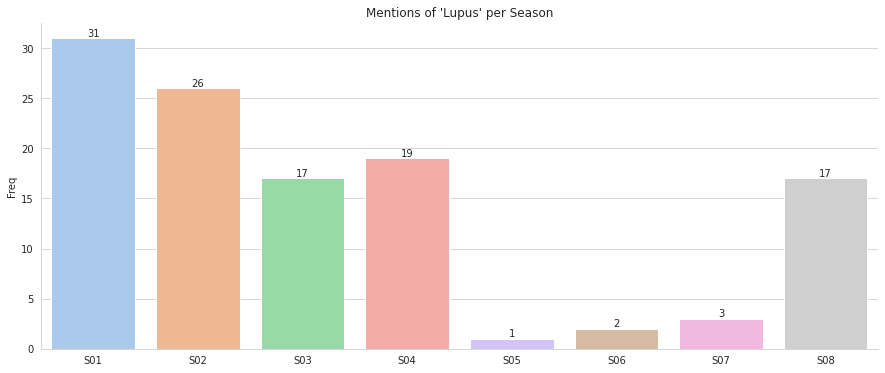

In [83]:
plt.figure(figsize=(15,6))
mps = sns.countplot(x='season', data=all_seasons[(all_seasons.tokens == 'lupus')])
mps.set(xlabel='', ylabel='Freq', title="Mentions of 'Lupus' per Season",
      xticklabels=['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08'])
mps.bar_label(mps.containers[0])
sns.despine()


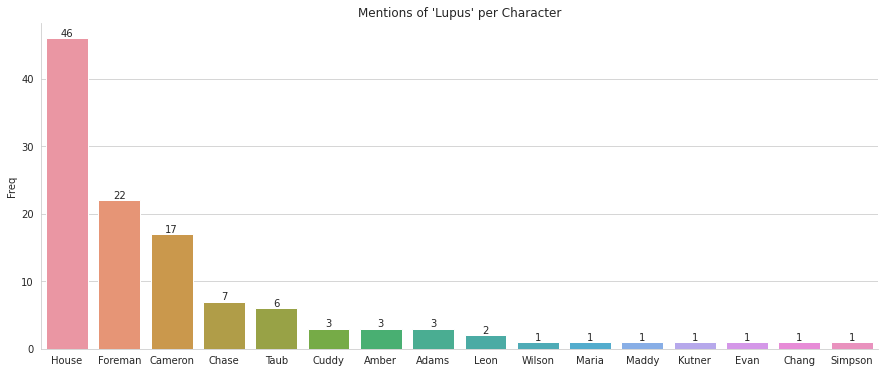

In [84]:
plt.figure(figsize=(15,6))
mpc = sns.countplot(x='name', data=all_seasons[(all_seasons.tokens == 'lupus')], order = all_seasons[(all_seasons.tokens == 'lupus')]['name'].value_counts().index)
mpc.set(xlabel='', ylabel='Freq', title="Mentions of 'Lupus' per Character",
xticklabels=['House', 'Foreman', 'Cameron', 'Chase', 'Taub', 'Cuddy', 'Amber',
 'Adams', 'Leon', 'Wilson', 'Maria', 'Maddy', 'Kutner', 'Evan', 'Chang', 'Simpson'])
mpc.bar_label(mpc.containers[0])
sns.despine()

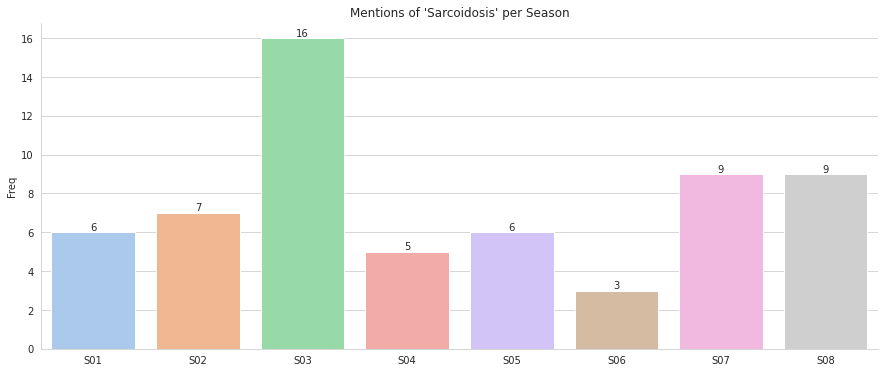

In [85]:
plt.figure(figsize=(15,6))
mps = sns.countplot(x='season', data=all_seasons[(all_seasons.tokens == 'sarcoidosis')])
mps.set(xlabel='', ylabel='Freq', title="Mentions of 'Sarcoidosis' per Season",
      xticklabels=['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08'])
mps.bar_label(mps.containers[0])
sns.despine()


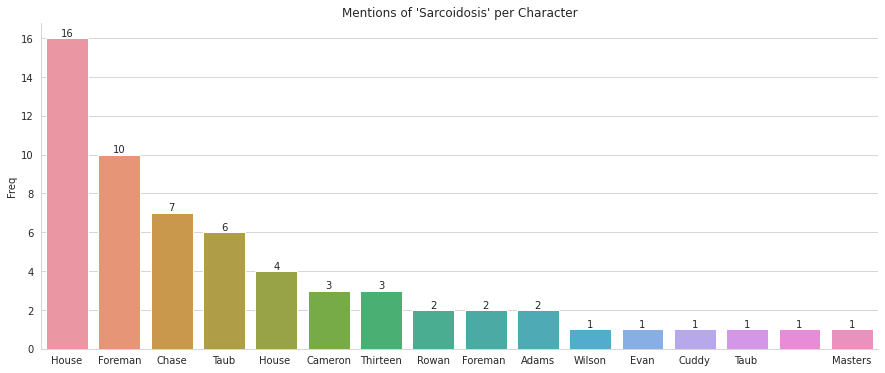

In [86]:
plt.figure(figsize=(15,6))
mpc = sns.countplot(x='name', data=all_seasons[(all_seasons.tokens == 'sarcoidosis')], order = all_seasons[(all_seasons.tokens == 'sarcoidosis')]['name'].value_counts().index)
mpc.set(xlabel='', ylabel='Freq', title="Mentions of 'Sarcoidosis' per Character")
mpc.bar_label(mpc.containers[0])
sns.despine()